In [1]:
#confirming gpu availability
!nvidia-smi

Mon Jan 23 04:24:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Installing modules
!pip install diffusers==0.11.0 
!pip install transformers scipy ftfy 
!pip install "ipywidgets>=7,<8" 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 25.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 117.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.7 MB/s eta 0:00:00


In [3]:
# Enabling widgets in google colab to have notebook_login access
from google.colab import output
output.enable_custom_widget_manager()

In [4]:
# Loggin in to HuggingFace using usertoken
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


In [5]:
#Upgrading diffusers from 0.3.0 to 0.11.0 to avoid attribute error during stablediffusion pipeline
!pip install --upgrade diffusers transformers scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.11.0
    Uninstalling diffusers-0.11.0:
      Successfully uninstalled diffusers-0.11.0


In [6]:
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 KB 5.8 MB/s eta 0:00:00


In [7]:
#Creating StableDiffusionPipeline in HuggingFace
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                               #since google colab has limited computation capacity, we are loading weights from half precision branch
                                               revision = "fp16", torch_dtype = torch.float16, use_auth_token = True)


Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/307 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [8]:
#Moving our pipeline to GPU for faster inference
pipe = pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

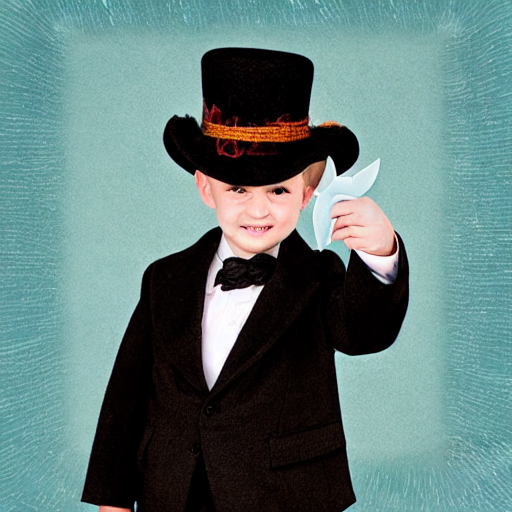

In [24]:
#providing text prompt to generate images using stable diffusion, the generated images are in PIL format.
prompt = """a leprachaun with a hat."""
# Since we are using half-precision weights, We will use 'autocast' to run the inference faster 
from torch import autocast
with autocast("cuda"):
   image =pipe(prompt).images[0]
display(image)



OBSERVATION: IF I RUN THE ABOVE CELL MULTIPLE TIMES, IT GENERATES DIFFERENT IMAGES.

  0%|          | 0/50 [00:00<?, ?it/s]

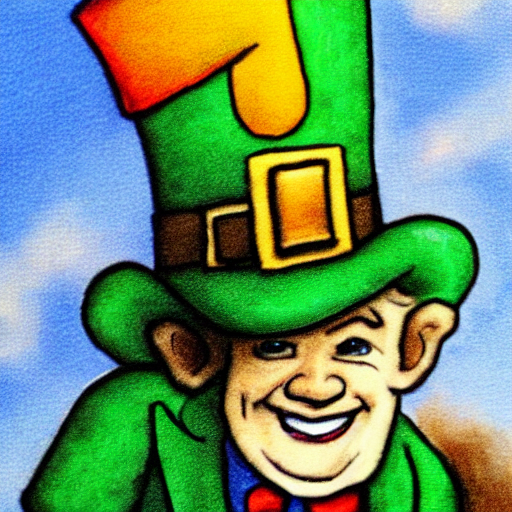

In [22]:
# To have some deterministic output, I have set some random seed to the pipeline.
generator = torch.Generator("cuda").manual_seed(100)
with autocast("cuda"):
  image = pipe(prompt, generator = generator).images[0]
image

  0%|          | 0/500 [00:00<?, ?it/s]

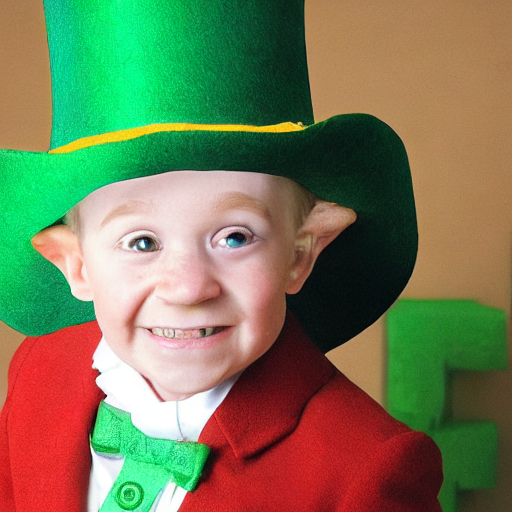

In [23]:
# For higher quality images, I also played around with the number of inference steps; more the number_of_steps, better the results
image = pipe(prompt, num_inference_steps=500).images[0]
image

In [28]:
#creating many images in one go
num_images = 4
prompt = ["two monkeys fighting over an icecream"] * num_images
with autocast("cuda"):
  images = pipe(prompt).images
images

  0%|          | 0/50 [00:00<?, ?it/s]

[<PIL.Image.Image image mode=RGB size=512x512 at 0x7FF9BC25B100>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FF9BC25B370>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FFA4A444AC0>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FF9BC2761C0>]

In [29]:
#importing modules
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#function to convert pillow image to numpy array
def pre_process_img(img):
  img = np.asarray(img)
  return img



In [30]:
#Append preprocessed images in a list
img_array = []
for image in images:
  img_array.append(pre_process_img(image))
img_array[0].shape


(512, 512, 3)

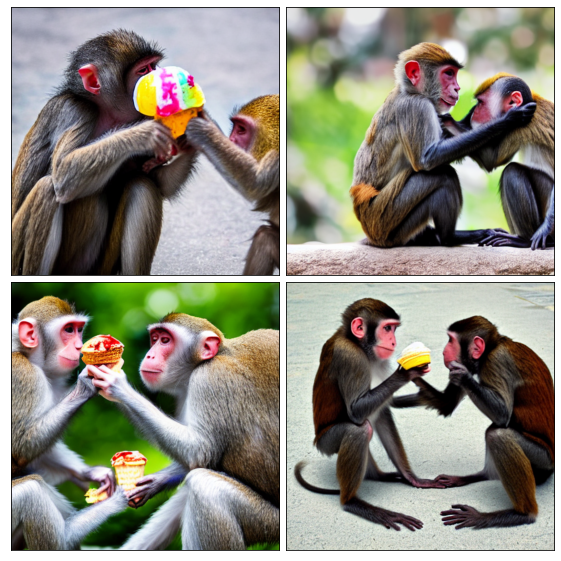

In [31]:
# Define the figure size
fig = plt.figure(figsize = (10.,10.))
#Creating a 2x2 grid of axes
from mpl_toolkits.axes_grid1 import ImageGrid
grid = ImageGrid(fig, 111, nrows_ncols = (2,2), axes_pad = 0.1)

for ax, im in zip(grid, img_array):
  ax.imshow(im)
  ax.set_xticks([])
  ax.set_yticks([])


  0%|          | 0/50 [00:00<?, ?it/s]

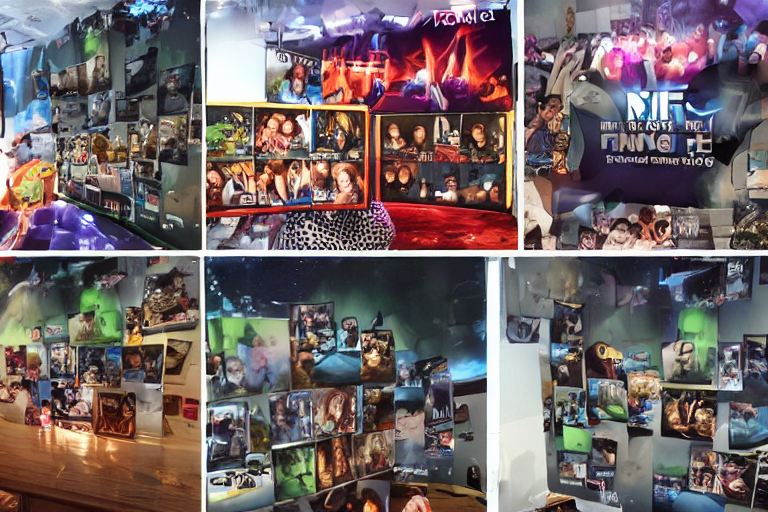

In [35]:
# trying if the model can generate non-square images
prompt = "nft images"
with autocast("cuda"):
  image = pipe(prompt, height = 512, width = 768).images[0]
image